## Machine Learning Diagnostics and model Selection

Como verficamos que un modelo es correcto o no. Como diagonosticamos y como podemos mejorar el modelo.  

Ya habiamos visto todo el tema de matriz confusion. Ahora la pregunta es como mejorar la precision. Mejor dicho los resultados en la matriz de confusion.

Inicialmente podemos pensar que podemos dividir los datos en dos conjuntos

*  **Entrenamiento** (70%)
*  **Prueba**  (30%)

Sin embargo es preferible dividirlos en 3 como sigue

1. Entremiento (40%) no tiene que ser 40%. 
2. Validacion (cross-validation, validacion cruzada). 30%
3. Prueba 30%. 

En la validacion queremos hacer un estimado preliminar de como va el aprendizaje. Es un monitoreo. En la la validacion k-fold validation. 
Parte el grupo de datos de validacion en $k$ "montones". Toma uno de esos montones y lo enfrenta al resto. Es decir, coja el primer monton. El resto lo usa para entremiento y el primero para prueba. Anota la precision en una tabla. Luego toma el segundo monton $i=2$, lo separa , entrena coon
$1,3,4,5, \cdots, k$ y prueba con $i=2$, anota la precision y asi hasta el ulimo monton $i=k$, entrena con $1,2, \cdots, k-1$, y prueba con $i=k$, anota la preci

Ejemplo:

Queremos formular un modelo polinomial. Pero no sabemos exactamente el orden del polinomio. Entonces mas coonsiderar 6 hipotesis:

\begin{eqnarray}
h_1(\theta, x) &=& \theta_0 + \theta_1 x \\
h_2(\theta_, x) &=& \theta_0 + \theta_1 x + \theta_2 x^2 \\
&\vdots& \\
h_6(\theta, x) &=& \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \cdots + \theta_5 x^6 
\end{eqnarray}

Consideramos 3 conjuntos de datos. Entrenamiento, Validacion y Prueba.
Las funciones  de costo, en cada caso estan dadas por:

\begin{eqnarray}
J_{\text{train}}(\theta) &=& \frac{1}{2 m_{\text{train}}} \left [
    \sum_{i=1}^{m_{\text{train}}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{train}}} \theta_i^2 \right ] \\
J_{\text{cv}}(\theta) &=& \frac{1}{2 m_{\text{cv}}} \left [
    \sum_{i=1}^{m_{\text{cv}}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{cv}}} \theta_i^2 \right ] \\
J_{\text{test}}(\theta) &=& \frac{1}{2 m_{\text{test}}} \left [
    \sum_{i=1}^{m_{\text{test}}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{test}}} \theta_i^2 \right ] \\
\end{eqnarray}

Se entrena con los datos de entrenamiento y $J_{\text{train}}(\theta)$ para los 6 polinomios de arriba. Se escoje el polinomio que arroje menor error o donde la $J_{\text{train}}(\theta)$ sea el mas pequenho. Se escojen esos $\theta$. 

Vamos a la validacion cruzada. Se comienza con los $\theta$ hallados en el punto anterior. Se verfica que la precision es buena. Sino, se prueban de nuevo los 6 polinomios con sus funciones objetivos a ver si observa alguna mejor en otro polinomio. Si, si, se puede prabar $J_{\text{test}}(\theta)$. 

In [4]:
# este tipo de separacion de datos esta en todos los paquetes
# de python para ML
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# carga los datos de openml
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
len(X_test)/(len(X_train) + len(X_test)) 

0.3

## Bias (sesgo) Versus Variance (varianza)

* **Bias** (sesgo): Es el error que ocurre entre el modelo real y media de nuestra hipotesis. 

* **Variance** (varianza). Mide que tanto nos ajustamos a los datos ruidosos.
El tamano de la varianza mide que tanto "oscila" nuestra solucion o que variabilidad tiene las predicciones con respecto al modelo.

* **Noise** los datos por naturaleza traen ruido

Vamos a ver que estos dos conceptos se "contra puntean".

Hay un "trade off", un compromiso

Para hacer este analisis comenzamos con la funcion de costo

$$ J(\theta) = \frac{1}{2m} \left [  \sum_{i=1}^m ( y_i - h(\theta, x^{(i)})^2 + \lambda \sum_{i=1}^n \theta_i^2 \right ]  $$

 Vamos a ver como en en esta funcion de costo estan escondidas
 el sesgo y la varianza y como ellos tienen un "trade off".

 Asumamos un model simple

 $$ y = f(x) +  \epsilon $$
Aca $y$ so las etiquetas (no cambian), $x$ son los datos, $f$ es el modelo y $\epsilon$ es una variable aleatoria con desviacion estandar $\sigma$ que mide el ruido. 

La hiptesis $h(\theta, x)$ la vamos a llamar simplmente $h(x)$ (en este punto $\theta$ no es relevante). 


Hasta el momento los concpetos de bias y variance han sido cualitativos.

### Analisis cuantitivo.
Por el momento consideramos que no hay ruido $\epsilon=0$, $\sigma=0$. 

Un poco de estadistica:
El concepto de MSE
$$E[( y - h(x)^2] = \sum_{i=1}^m (y_i - h(x_i))^2 p(x_i)$$

Si la distribucion de probabilidad es uniforme $p(x_i)=1/m$. Y obtenemos

$$E[( y - h(x)^2] = \frac1m \sum_{i=1}^m (y_i - h(x_i))^2 $$

De alguna forma nuestra funcion de costo es el MSE + regularizacion.

Definamos Bias y Var cuantitativamente:

$$ \mathbb{Bias}[h(x)] = E[h(x)] - E[f(x)] $$

$$ \mathbb{Var} [h(x] = E[h^2(x)] - E^2[h(x)]$$

El calculo a continuacion evalua el MSE y los pone en terminos de Bias, and Var.

\begin{eqnarray}
E[( y - h(x)^2] &=& E[ y^2 - 2 y h(x) + h^2(x)] = y^2 - 2y E[h(x)] + E[h^2(x)] \\
\mathbb{Bias}^2[h(x)] &=& ( E[h(x)] - E[f(x)])^2 \\
&=& E^2[h(x)] - 2 E[h(x)] E[f(x)] + E^2[f(x)] \\
&=& E^2[h(x)] - 2 y E[h(x)] + y^2 \\
\mathbb{Var}[h(x)] &=& E[h^2(x)] - E^2[h(x)] 
 \end{eqnarray}

$$ E[( y - h(x)^2] =  y^2 - 2y E[h(x)] + E^2[h(x)] + ( E[h^2(x)] - E^2[h(x)]) =\mathbb{Bias}^2[h(x)] + \mathbb{Var}(h(x)) $$

En esta ultima ecuacion se aprecia la trade off entre Bias y Var  en su "engergia" total que produce el MSE (Means Squared Error) que es la funcion de costo (sin regularizacion y sin ruido).

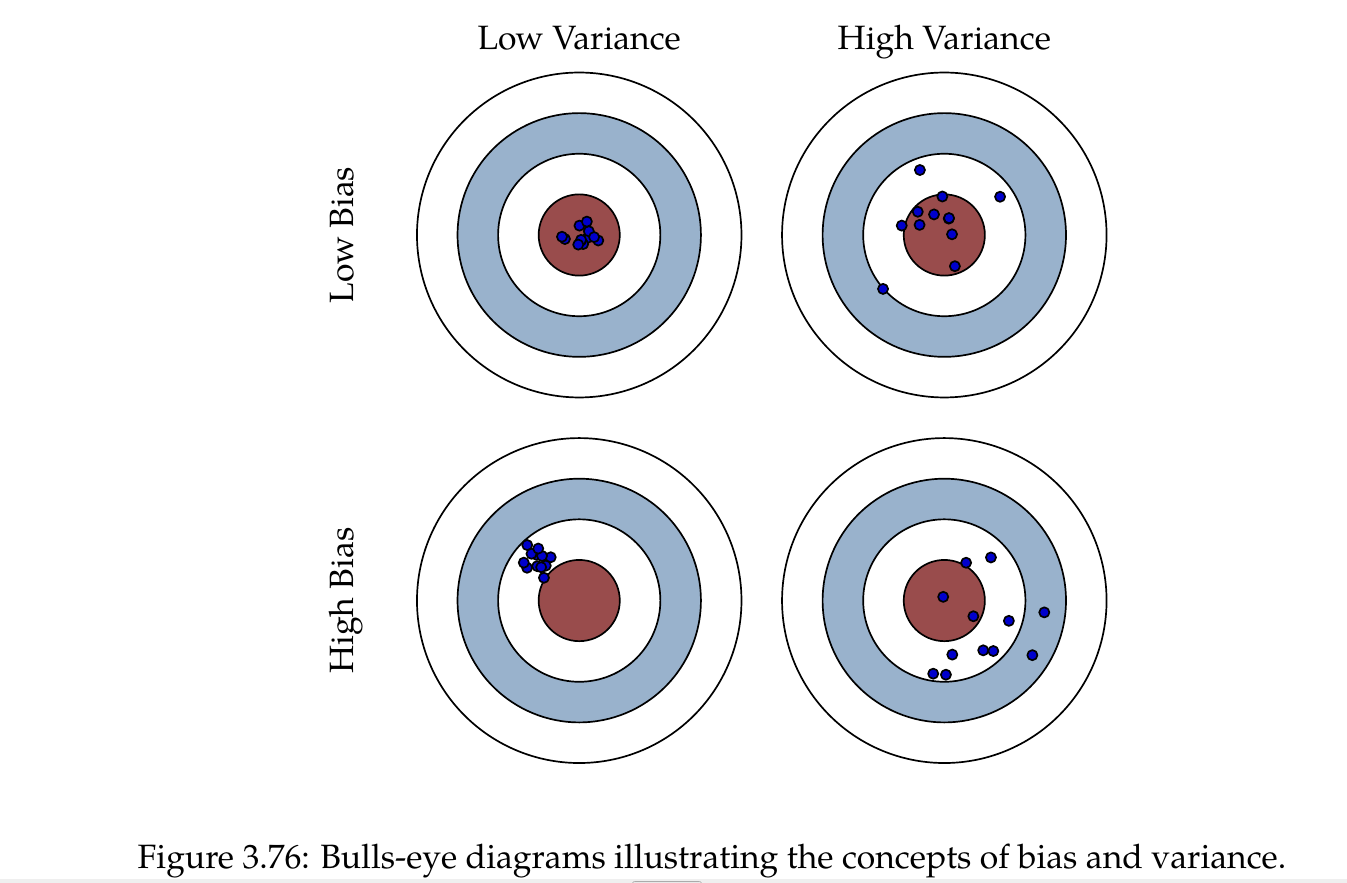

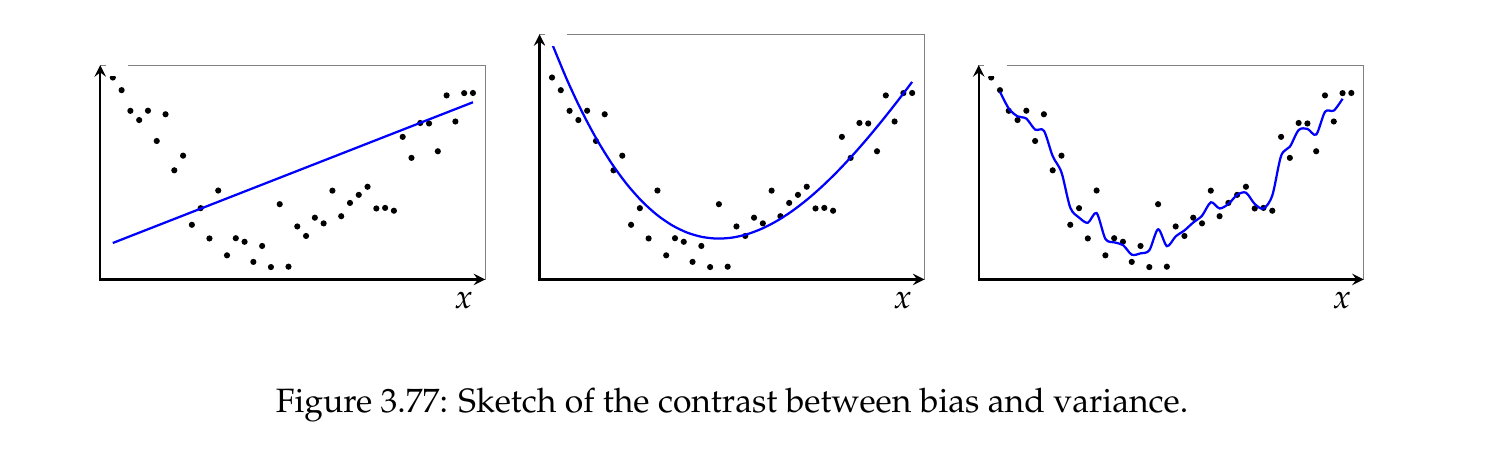

Las graficas fueron explicadas oralmente. Las graficas arriba muestran el compromiso entre sesgo y  varianza. En la ultima el diagrama del centro presenta un buen balance entre bias y variance y (overfitting (la ultima) y underfitting( la primera). 

La del "bulls eye" (tiro al blanco) indica cuatro combinaciones posibles:

* bajo sesgo, baja varianza: El mejor
* bajo sesgo, alta varianza: (esta centrado pero disperso)
* alto sesgo, baja varianza: estan lejos del "target" pero juntos
* alto sesgo, alta varianza: estan lejos del target y dispersos (ese soy yo).

8:**10**


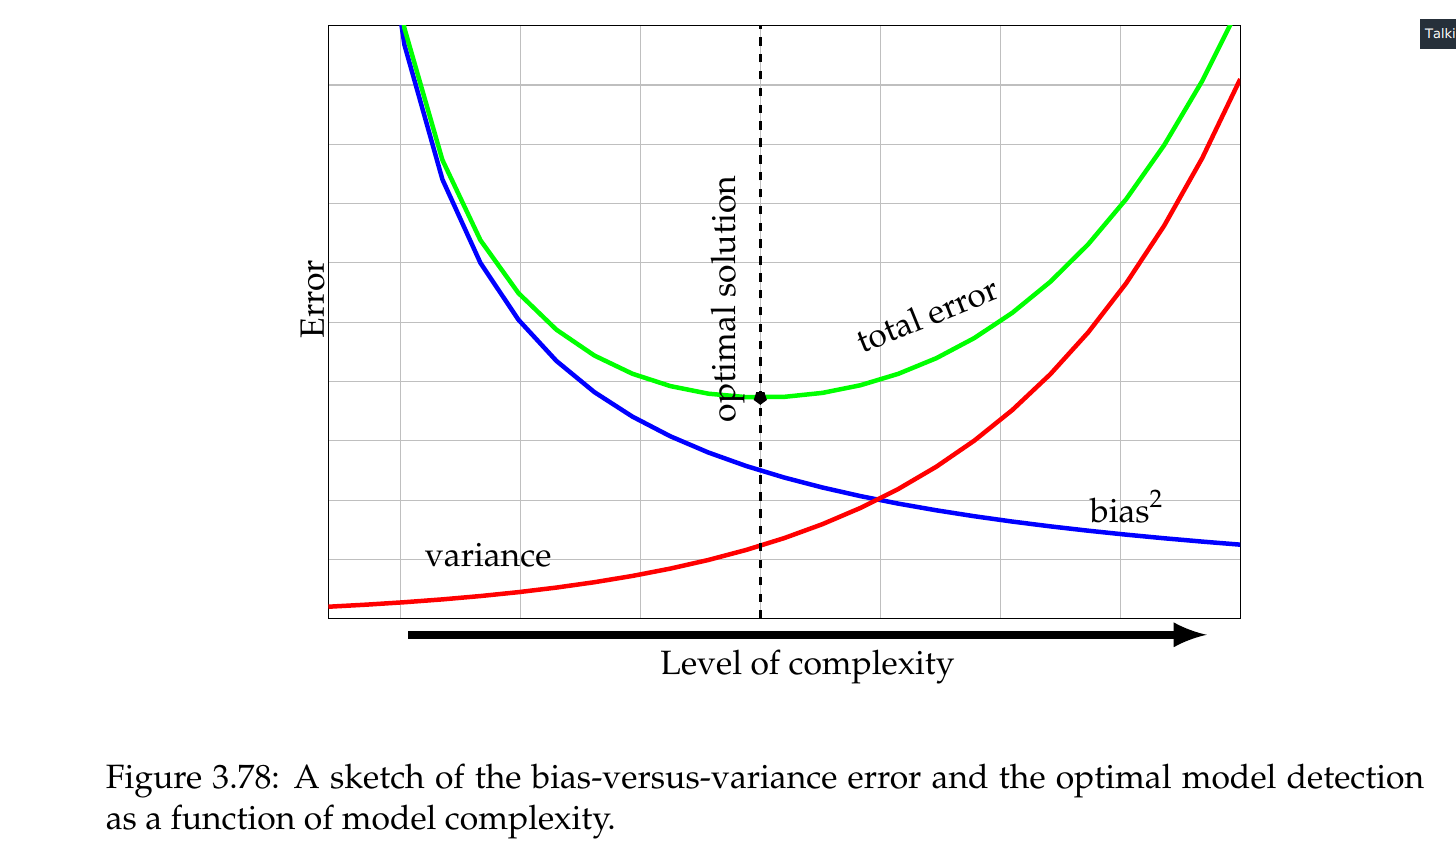

* Bias : Un bias grande muestra "underfitting".  
    Como se alivia:
    * Agregar mas atributos. Polinomios de mas alto orden, 
    * mas capas en un red neuronal, o mas mas nodos por capas. 
    * Reducir el tamano del parametro de regularizacion λ.

* Variance: Un variance grande muestra "overfitting": 
    para remdediar esto:
    * Reduzca el numero de parametros. Polinomios de bajo grado, 
    * Redes con menos nodos o capas.
    * Aumentar el tamano de λ .

## Learning curves: Son curvas para mejorar el diagnostico

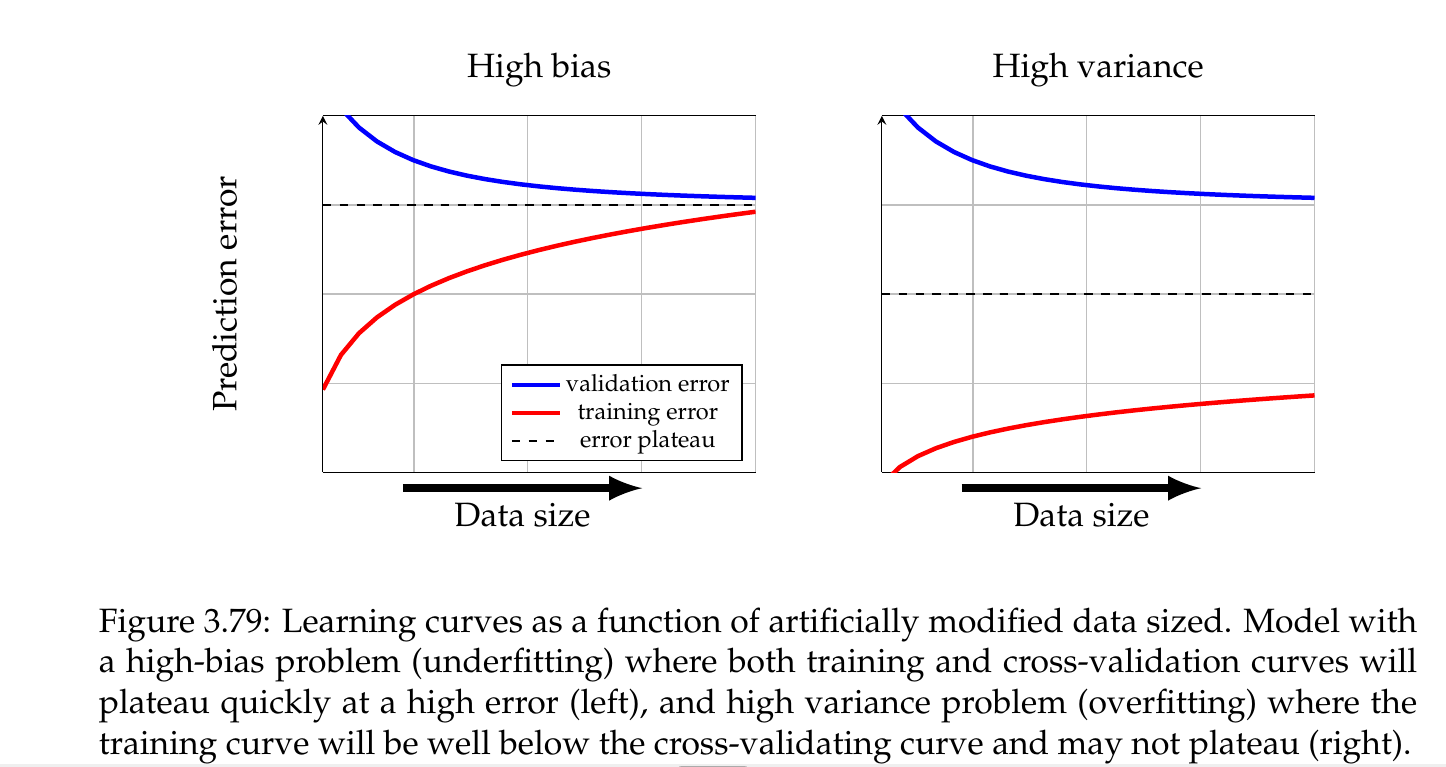

# SVM: Support Vector Machines: Maquinas de soporte vectorial.
La idea que tuvo originilamente Vladimir Vapnick es la de encontrar un "hiperplano" que maximise la separacion de los objetos "gatos" y "perros".
SVM es una clasificacion binaria, pero se puede extender a multiclases con el "one-vs-all". 

Mientras que en regresion lineal minimizamos la funcioon de costo:

$$ J(a,b) =\frac{1}{2m} \sum_{i=1}^m [ y_i - (a x_i + b)]^2$$
donde $y=ax+b$ es la linea de regresion.

En SVM, **maximizamos** las distancias entre los puntos y un **hiperplano** que los separa.

$$J(a,b) = \frac{1}{2m} \sum_{i=1}^m d^2[ (x_i, y_i), L(a,b)] $$

Aplicaciones: son muchas, ver las notas, la tarea de SVM para semana de arriba,
lean las notas e investiguen.



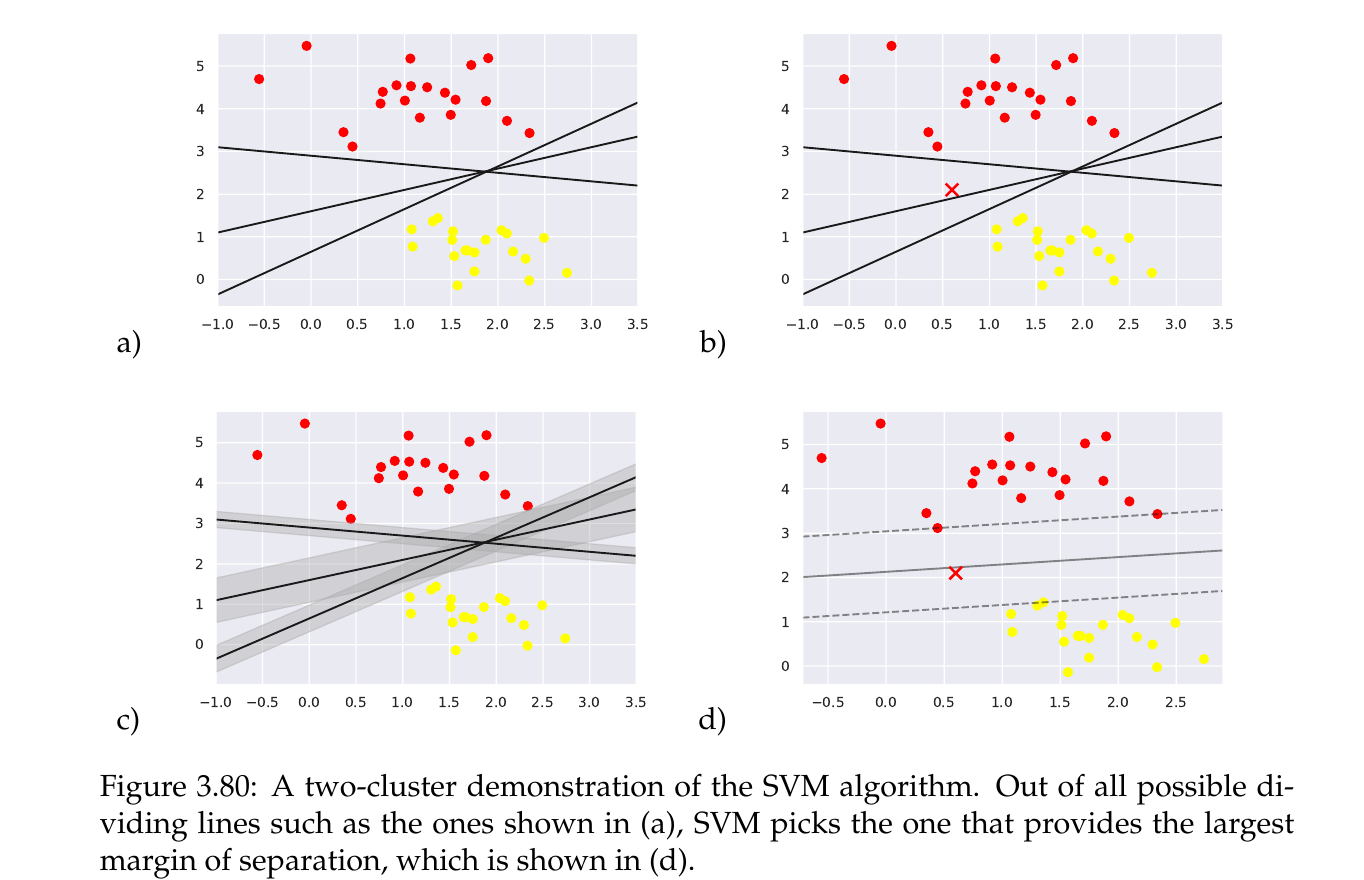

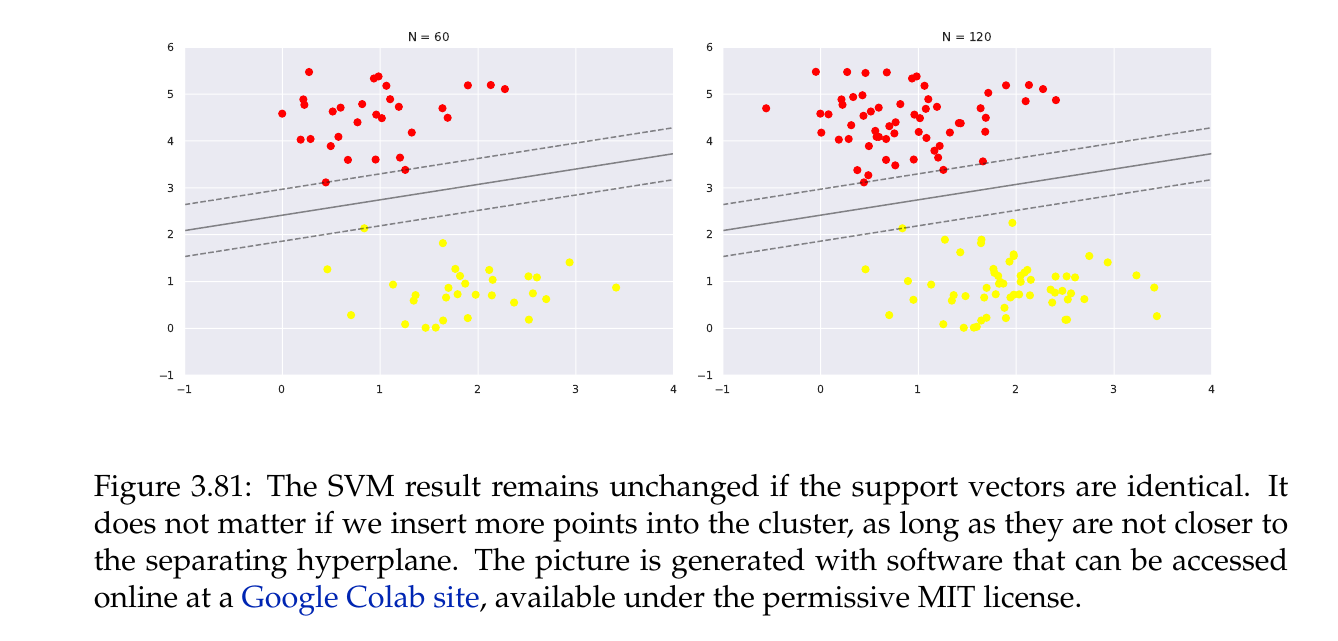

* El metodo es geometrico y por lo tanto intuitivo, no probabilistico. 
* Es eficiente por que los vectores de soporte (los que estan sobre las margenes punteadas) son una minoria y "generalmente" no cambian. 

## Funcion de costo para SVM.